In [14]:
import time
import numpy as np
import matplotlib.pyplot as plt
from Functions import StatisticalAnalysis
import sys
sys.path.insert(0, '/home/micael/MyWorkspace/PtRelAnalysis/functions')
import HistogramFunctions,FigureFunctions,FitFunctions,FunctionsTypes

from scipy import stats
from sklearn.decomposition import PCA, FastICA

import rootnotes
import root_numpy
from ROOT import *
import StatisticalAnalysis
#from ROOT import TCanvas, TFile, TPaveText
from scipy.stats import chisquare,kurtosistest,normaltest

# local to save all results and images 

save_images = '/home/micael/MyWorkspace/ICA/BlindSeparation/run9'


# Calibration of Divergences

In [ ]:
# define the pdf for calibration 
from scipy.stats import *
chi2.stats(4)

In [ ]:
# Calibrate the KL and JS divergences
i_stats = 1000
loc, scale = 0.,1.
laplacian = np.reshape(np.random.laplace(loc,scale, i_stats),[1,i_stats])
uniform = np.reshape(np.random.uniform(-2*scale,2*scale,i_stats),[1,i_stats])
gaus = np.reshape(np.random.normal(loc,scale,i_stats),[1,i_stats])
#rayleigh = np.reshape(np.random.rayleigh(scale, i_stats),[1,i_stats])
#chi = np.reshape(np.random.chisquare(4, i_stats),[1,i_stats])

C = np.zeros([4,i_stats])
C[0,:]=uniform
C[1,:]=gaus
C[2,:]=laplacian
C[3,:]=norm_K
#C[4,:]=chi
#StatisticalAnalysis.JSDiv(C,C)
KL_div= StatisticalAnalysis.CreateKLsMatrix(C,C)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(C,C)

In [ ]:
KL_div,SKL_div,JS_div

In [ ]:
SKL_div,JS_div

# Separate the mixtures
 $\to$ Make decision by using the ROOT Fit

In [36]:
x = np.loadtxt('NinthMixture100Stats.txt')
x.shape

(3, 100)

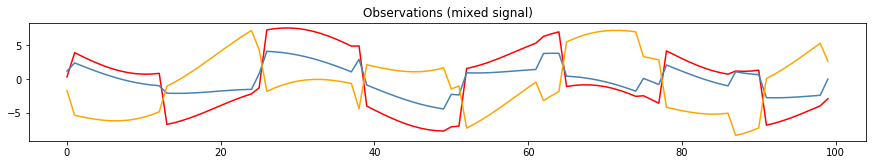

In [37]:
# Use this for Time Series
fig, ax = plt.subplots(1,figsize=(15,10))

models = [x]#, S, S_, H]
names = ['Observations (mixed signal)']
         #'True Sources',
         #'ICA recovered signals',
         #'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model, colors):
        plt.plot(sig, color=color)

#plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

In [38]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh')
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)

number of interations: 3
Time to converges the FastICA: 0.003 seconds


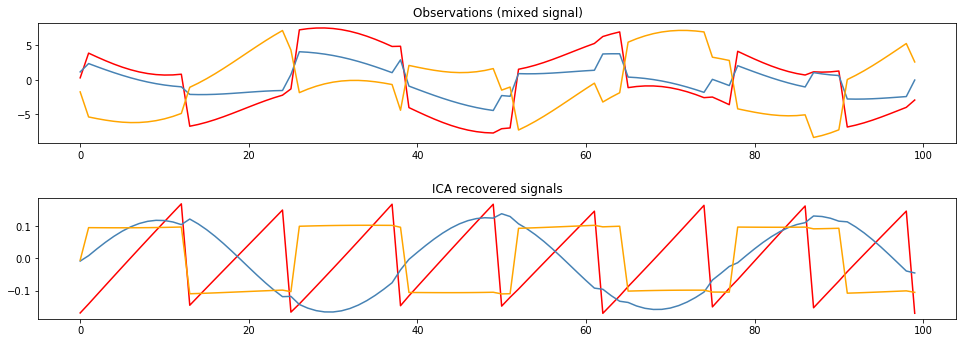

In [39]:
# Use for time series
fig, ax = plt.subplots(1,figsize=(15,10))

models = [x,recovered_sources]#, S, S_, H]
names = ['Observations (mixed signal)',
         'ICA recovered signals']
         #'True Sources',
         #
         #'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.savefig(save_images+'/'+'Result_time_serie_100_run9.png')
plt.show()

# Using 1000 stats

In [40]:
x = np.loadtxt('NinthMixture1000Stats.txt')
x.shape

(3, 1000)

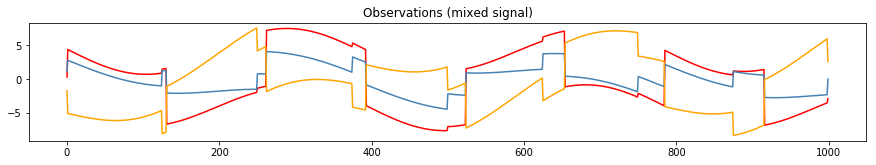

In [41]:
# Use this for Time Series
fig, ax = plt.subplots(1,figsize=(15,10))

models = [x]#, S, S_, H]
names = ['Observations (mixed signal)']
         #'True Sources',
         #'ICA recovered signals',
         #'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model, colors):
        plt.plot(sig, color=color)

#plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)

plt.show()

In [42]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh')
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)

number of interations: 3
Time to converges the FastICA: 0.003 seconds


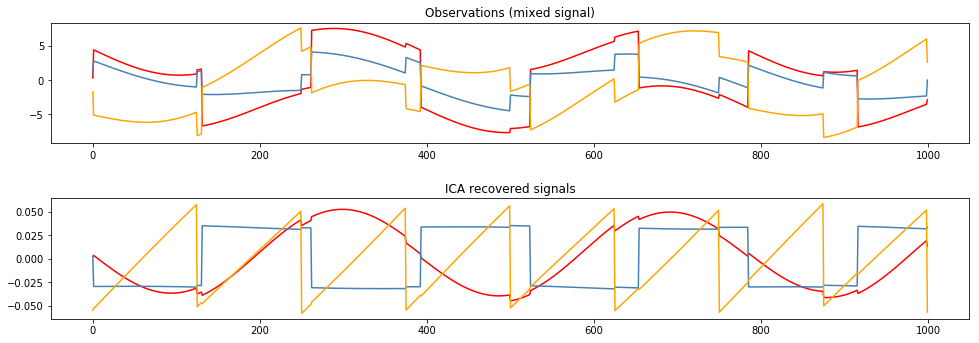

In [43]:
# Use for time series
fig, ax = plt.subplots(1,figsize=(15,10))

models = [x,recovered_sources]#, S, S_, H]
names = ['Observations (mixed signal)',
         'ICA recovered signals']
         #'True Sources',
         #
         #'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.savefig(save_images+'/'+'Result_time_serie_1000_run9.png')
plt.show()

# Using 100K stats

In [44]:
x = np.loadtxt('NinthMixture100000Stats.txt')
x.shape

(3, 100000)

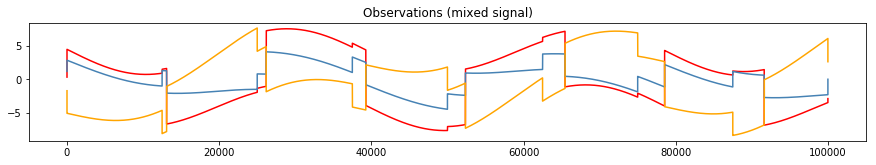

In [45]:
# Use this for Time Series
fig, ax = plt.subplots(1,figsize=(15,10))

models = [x]#, S, S_, H]
names = ['Observations (mixed signal)']
         #'True Sources',
         #'ICA recovered signals',
         #'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model, colors):
        plt.plot(sig, color=color)

#plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)

plt.show()

In [46]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh')
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)

number of interations: 4
Time to converges the FastICA: 0.200 seconds


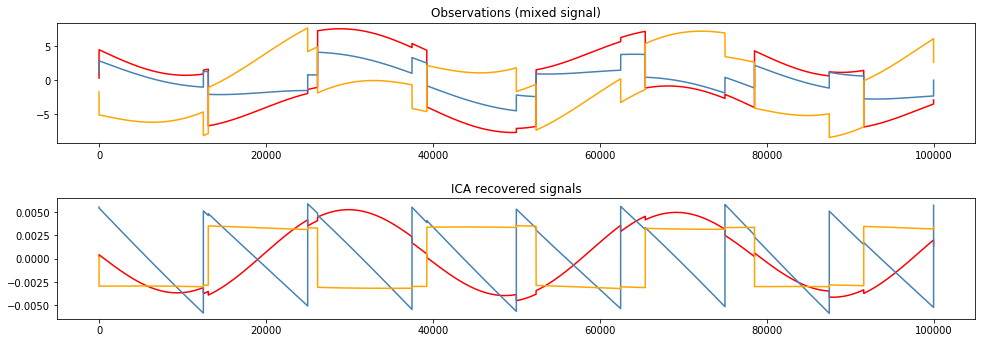

In [47]:
# Use for time series
fig, ax = plt.subplots(1,figsize=(15,10))

models = [x,recovered_sources]#, S, S_, H]
names = ['Observations (mixed signal)',
         'ICA recovered signals']
         #'True Sources',
         #
         #'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.savefig(save_images+'/'+'Result_time_serie_100000_run9.png')
plt.show()